In [27]:
"""Fill missing values"""
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os

In [3]:
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df_final = pd.DataFrame(index=dates)
    if "SPY" not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, "SPY")

    for symbol in symbols:
        file_path = symbol_to_path(symbol)
        df_temp = pd.read_csv(file_path, parse_dates=True, index_col="Date",
            usecols=["Date", "Adj Close"], na_values=["nan"])
        df_temp = df_temp.rename(columns={"Adj Close": symbol})
        df_final = df_final.join(df_temp)
        if symbol == "SPY":  # drop dates SPY did not trade
            df_final = df_final.dropna(subset=["SPY"])

    return df_final


def plot_data(df_data):
    """Plot stock data with appropriate axis labels."""
    ax = df_data.plot(title="Stock Data", fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
    
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    df = df.pct_change()
    df.ix[0,:] = 0
    return df

0.000635578332225
0.0133704908994


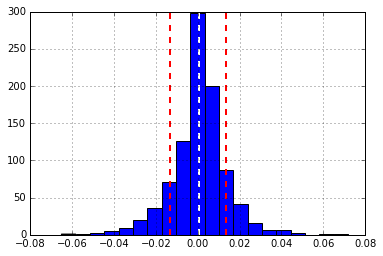

In [20]:
symbol_list = ["SPY", 'XOM', 'GLD']  # list of symbols
start_date = "2009-01-01"
end_date = "2012-12-31"
dates = pd.date_range(start_date, end_date)  # date range as index
df_data = get_data(symbol_list, dates)  # get data for each symbol

daily_returns = compute_daily_returns(df_data)

daily_returns['SPY'].hist(bins=20)

mean = daily_returns['SPY'].mean()
print mean
std= daily_returns['SPY'].std()
print std

plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)

plt.show()

In [21]:
# Compute kurtosis
print daily_returns.kurtosis()

SPY    3.220278
XOM    2.145326
GLD    1.824649
dtype: float64


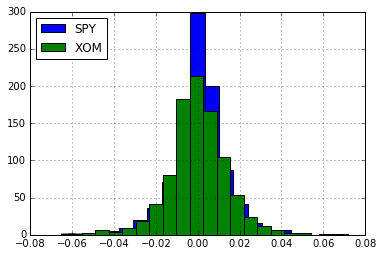

In [22]:
# Plot two histograms together

daily_returns['SPY'].hist(bins=20, label='SPY')
daily_returns['XOM'].hist(bins=20, label='XOM')
plt.legend(loc='upper left')
plt.show()

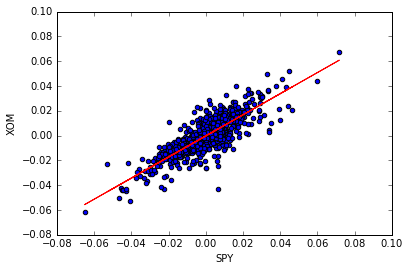

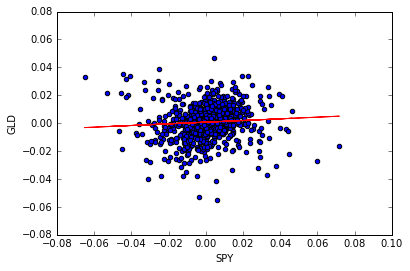

Beta XOM: 0.850746223673
Alpha XOM: -0.00024686727668

Beta GLD: 0.0597611348322
Alpha GLD: 0.00074788111616


In [31]:
# Create scatter plot for SPY vs XOM

daily_returns.plot(kind='scatter', x='SPY', y='XOM')

# Fit streight line into the scatterplots
beta_XOM, alpha_XOM = np.polyfit(daily_returns["SPY"],daily_returns['XOM'],1)
plt.plot(daily_returns['SPY'], beta_XOM * daily_returns['SPY'] + alpha_XOM, '-', color='r')
plt.show()

daily_returns.plot(kind='scatter', x='SPY', y='GLD')
# Fit streight line into the scatterplots
beta_GLD, alpha_GLD = np.polyfit(daily_returns["SPY"],daily_returns['GLD'],1)
plt.plot(daily_returns['SPY'], beta_GLD * daily_returns['SPY'] + alpha_GLD, '-', color='r')
plt.show()

print 'Beta XOM:',beta_XOM
print 'Alpha XOM:',alpha_XOM
print '\nBeta GLD:',beta_GLD
print 'Alpha GLD:',alpha_GLD

In [33]:
# Calculate correlation cooefficient
print daily_returns.corr(method='pearson')

          SPY       XOM       GLD
SPY  1.000000  0.820241  0.067324
XOM  0.820241  1.000000  0.069687
GLD  0.067324  0.069687  1.000000
